#Final results
trained over 60,000 images and tested over 10,000 image from MNSIT dataset
##CPU
###overall:97%
###digitwise:
####Accuracy of 0 is : 98 %
####Accuracy of 1 is : 98 %
####Accuracy of 2 is : 97 %
####Accuracy of 3 is : 96 %
####Accuracy of 4 is : 98 %
####Accuracy of 5 is : 96 %
####Accuracy of 6 is : 97 %
####Accuracy of 7 is : 96 %
####Accuracy of 8 is : 96 %
####Accuracy of 9 is : 94 %
###Total time for training on *CPU* is **856.8572928905487 s** i.e approx **14.3 min**; avg **2.85 min per epoch**
###Total time taken for training on *GPU* is **103.50141191482544 s** i.e. approx **1.7 min**; **avg 0.34 min per epoch**
##GPU
###overall accuracy is 97%
####digit wise accuracy is:
####Accuracy of 0 is : 98 %
####Accuracy of 1 is : 98 %
####Accuracy of 2 is : 96 %
####Accuracy of 3 is : 98 %
####Accuracy of 4 is : 99 %
####Accuracy of 5 is : 95 %
####Accuracy of 6 is : 97 %
####Accuracy of 7 is : 96 %
####Accuracy of 8 is : 96 %
####Accuracy of 9 is : 95 %


Importing necessary modules

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim


Loading and normalizing MNSIT dataset

In [9]:
#convert the pil image to torch tensor and normalize it
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307), (0.3081))])
trainset = torchvision.datasets.MNIST(root = './data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True,num_workers=2)
testset = torchvision.datasets.MNIST(root = './data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=32,shuffle=False,num_workers=2)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw





Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


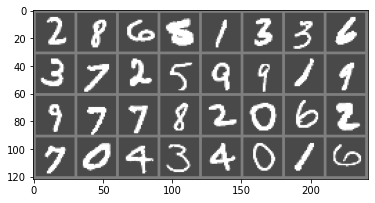

torch.Size([32]) torch.Size([32, 1, 28, 28])


In [3]:
def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.show()
dataiter = iter(trainloader)
image ,labels = dataiter.next()
imshow(torchvision.utils.make_grid(image))
print(labels.shape,image.shape)

Define a convolutional network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class dig_clasfr(nn.Module):
  def __init__(self):
    super(dig_clasfr,self).__init__()
    self.C1 = nn.Conv2d(1,32,kernel_size=(3,3),stride=1)
    self.C2 = nn.Conv2d(32,64,kernel_size=(3,3),stride=1)
    self.S3 = nn.MaxPool2d(kernel_size=(2,2))
    self.D3 = nn.Dropout2d(p=0.25)
    self.F4 = nn.Linear(9216,128)
    self.D4 = nn.Dropout(p=0.5)
    self.OL = nn.Linear(128,10)
  def forward(self,x):
    x = F.relu(self.C1(x))
    x = F.relu(self.C2(x))
    x = self.S3(x)
    x = self.D3(x)
    x = x.view(x.size(0),-1)
    x = F.relu(self.F4(x))
    x = self.D4(x)
    x = F.softmax(self.OL(x),dim = 1)
    return x

dig_clasfr = dig_clasfr()  

Defining loss function and optimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dig_clasfr.parameters(),lr = 0.1)

training over dataset

In [34]:
import time
t_start=time.time()
for epoch in range(5):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    img , label = data
    #zero the parameter gradient
    optimizer.zero_grad()
    #forward + backward +optimization
    output = dig_clasfr(img)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    #statistics
    if i%100 == 99:
      print('[%d %5d] : %0.3f'%(epoch+1,i+1,running_loss/100))
      running_loss = 0.0
  print("total time taken for %d epoch is :"%(epoch+1),str(time.time()-t_start))    
print('Finished Training')




[1   100] : 1.487
[1   200] : 1.492
[1   300] : 1.488
[1   400] : 1.488
[1   500] : 1.494
[1   600] : 1.490
[1   700] : 1.489
[1   800] : 1.493
[1   900] : 1.492
[1  1000] : 1.490
[1  1100] : 1.486
[1  1200] : 1.492
[1  1300] : 1.489
[1  1400] : 1.491
[1  1500] : 1.489
[1  1600] : 1.491
[1  1700] : 1.488
[1  1800] : 1.487
total time taken for 1 epoch is : 159.66304755210876
[2   100] : 1.491
[2   200] : 1.488
[2   300] : 1.491
[2   400] : 1.490
[2   500] : 1.485
[2   600] : 1.494
[2   700] : 1.482
[2   800] : 1.490
[2   900] : 1.491
[2  1000] : 1.489
[2  1100] : 1.488
[2  1200] : 1.486
[2  1300] : 1.484
[2  1400] : 1.488
[2  1500] : 1.488
[2  1600] : 1.484
[2  1700] : 1.488
[2  1800] : 1.490
total time taken for 2 epoch is : 326.5917992591858
[3   100] : 1.485
[3   200] : 1.488
[3   300] : 1.490
[3   400] : 1.487
[3   500] : 1.484
[3   600] : 1.483
[3   700] : 1.491
[3   800] : 1.483
[3   900] : 1.481
[3  1000] : 1.482
[3  1100] : 1.485
[3  1200] : 1.484
[3  1300] : 1.483
[3  1400] : 1

checking a sample of code

In [14]:
classes = ('0','1','2','3','4','5','6','7','8','9')
classes[5]

'5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


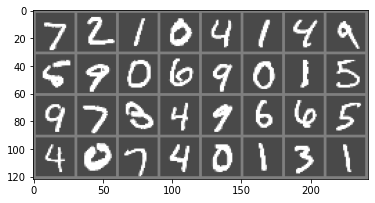

    7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1
    7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1


In [19]:

dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(32)))
output = dig_clasfr(images)
_,predicted = torch.max(output,1)
print(' '.join('%5s'%classes[predicted[j]] for j in range(32)))

testing the dataset over whole dataset

In [18]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = dig_clasfr(images)
    _,predicted = torch.max(outputs,1)
    total +=labels.size(0)
    correct += (predicted==labels).sum().item()
print("accuracy of model over 10000 test images : %d %%"%(100*correct/total))

accuracy of model over 10000 test images : 97 %


In [32]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
print(class_correct)
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = dig_clasfr(images)
    _,predicted = torch.max(outputs,1)
    c=(predicted == labels).squeeze()
    for i in range(16):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label]+=1
print(class_correct,class_total)
for i in range(10):
  print("Accuracy of %s is : %2d %%"%(classes[i],100*class_correct[i]/class_total[i]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[468.0, 574.0, 534.0, 494.0, 499.0, 416.0, 450.0, 498.0, 453.0, 486.0] [474.0, 581.0, 545.0, 513.0, 508.0, 429.0, 460.0, 514.0, 468.0, 516.0]
Accuracy of 0 is : 98 %
Accuracy of 1 is : 98 %
Accuracy of 2 is : 97 %
Accuracy of 3 is : 96 %
Accuracy of 4 is : 98 %
Accuracy of 5 is : 96 %
Accuracy of 6 is : 97 %
Accuracy of 7 is : 96 %
Accuracy of 8 is : 96 %
Accuracy of 9 is : 94 %


comparing the gpu and cpu time

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )
print(device)

cuda:0


In [7]:
dig_clasfr.to(device)

dig_clasfr(
  (C1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (C2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (S3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (D3): Dropout2d(p=0.25, inplace=False)
  (F4): Linear(in_features=9216, out_features=128, bias=True)
  (D4): Dropout(p=0.5, inplace=False)
  (OL): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
import time
t_start=time.time()
for epoch in range(5):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    img , label = data[0].to(device),data[1].to(device)
    #zero the parameter gradient
    optimizer.zero_grad()
    #forward + backward +optimization
    output = dig_clasfr(img)
    loss = criterion(output,label)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    #statistics
    if i%100 == 99:
      print('[%d %5d] : %0.3f'%(epoch+1,i+1,running_loss/100))
      running_loss = 0.0
  print("total time taken for %d epoch is :"%(epoch+1),str(time.time()-t_start))    
print('Finished Training')

[1   100] : 2.047
[1   200] : 1.786
[1   300] : 1.710
[1   400] : 1.671
[1   500] : 1.649
[1   600] : 1.634
[1   700] : 1.607
[1   800] : 1.591
[1   900] : 1.584
[1  1000] : 1.565
[1  1100] : 1.565
[1  1200] : 1.551
[1  1300] : 1.549
[1  1400] : 1.539
[1  1500] : 1.541
[1  1600] : 1.532
[1  1700] : 1.540
[1  1800] : 1.531
total time taken for 1 epoch is : 20.996236562728882
[2   100] : 1.522
[2   200] : 1.513
[2   300] : 1.516
[2   400] : 1.511
[2   500] : 1.517
[2   600] : 1.518
[2   700] : 1.511
[2   800] : 1.511
[2   900] : 1.517
[2  1000] : 1.510
[2  1100] : 1.511
[2  1200] : 1.501
[2  1300] : 1.515
[2  1400] : 1.506
[2  1500] : 1.511
[2  1600] : 1.510
[2  1700] : 1.511
[2  1800] : 1.506
total time taken for 2 epoch is : 41.58619499206543
[3   100] : 1.501
[3   200] : 1.506
[3   300] : 1.502
[3   400] : 1.498
[3   500] : 1.502
[3   600] : 1.493
[3   700] : 1.493
[3   800] : 1.499
[3   900] : 1.506
[3  1000] : 1.499
[3  1100] : 1.499
[3  1200] : 1.504
[3  1300] : 1.503
[3  1400] : 1

In [11]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device),data[1].to(device)
    outputs = dig_clasfr(images)
    _,predicted = torch.max(outputs,1)
    total +=labels.size(0)
    correct += (predicted==labels).sum().item()
print("accuracy of model over 10000 test images : %d %%"%(100*correct/total))

accuracy of model over 10000 test images : 97 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
print(class_correct)
with torch.no_grad():
  for data in testloader:
    images,labels = data[0].to(device),data[1].to(device)
    outputs = dig_clasfr(images)
    _,predicted = torch.max(outputs,1)
    c=(predicted == labels).squeeze()
    for i in range(16):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label]+=1
print(class_correct,class_total)
for i in range(10):
  print("Accuracy of %s is : %2d %%"%(classes[i],100*class_correct[i]/class_total[i]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[466.0, 573.0, 525.0, 504.0, 503.0, 409.0, 449.0, 497.0, 452.0, 494.0] [474.0, 581.0, 545.0, 513.0, 508.0, 429.0, 460.0, 514.0, 468.0, 516.0]
Accuracy of 0 is : 98 %
Accuracy of 1 is : 98 %
Accuracy of 2 is : 96 %
Accuracy of 3 is : 98 %
Accuracy of 4 is : 99 %
Accuracy of 5 is : 95 %
Accuracy of 6 is : 97 %
Accuracy of 7 is : 96 %
Accuracy of 8 is : 96 %
Accuracy of 9 is : 95 %
